<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab1_Additional_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

Name: Hany Hamed

Group: BS18-06



# This section is considered if we are going to change directly from the DE to TF.

#Change from the given DE to TF (General)
To change the following system to TF (Transfer Function).

$a_0 \ddot x + a_1 \dot x+ a_2 x = a_3 t + a_4 * 1$  (1),

$b_0 y = b_1 \dot x + b_2 x+ b_3 t + b_4*1$ (2)

We use the Laplace Transformation on both equations, and we consider $u(t) = a_3 t + a_4$ then $\mathcal{L}\{u(t)\} = U(s) = \frac{a_3}{s^2} + \frac{a_4}{s} = \frac{a_3 + a_4s}{s^2}$

$\mathcal{L}$ is the Laplace tranformation from the time-domain (t) to the frequence domain (s or p)

* Taking $\mathcal{L}$ for the $1^{st}$ equations to be as follows: (Notice that for transfer functions, it is assumed that all the intial values is zero, which means we can discard all the terms that have the initial values)

$a_0s^2X(s)+ a_1 sX(s)  + a_2X(s) = \frac{a_3}{s^2} + \frac{a_4}{s}$

= $(a_0s^2+ a_1 s  + a_2)X(s) = \frac{a_3}{s^2} + \frac{a_4}{s} = U(s)$

Then, $\frac{X(s)}{U(s)} = \frac{1}{a_0s^2+ a_1 s  + a_2}$


* Taking $\mathcal{L}$ for the $2^{nd}$ equations to be as follows: (Notice that for transfer functions, it is assumed that all the intial values is zero, which means we can discard all the terms that have the initial values)

$b_0Y(s) = b_1sX(s) + b_2X(s) + \frac{b_3}{s^2} + \frac{b_4}{s}$

By dividing the both sides by $b_0 U(s)$

= $\frac{Y(s)}{U(s)} = \frac{b_1s}{b_0} \frac{X(s)}{U(s)} + \frac{b_2}{b_0} \frac{X(s)}{U(s)} + \frac{b_3}{s^2} \frac{1}{U(s)} + \frac{b_4}{s} \frac{1}{U(s)} = G(s) = W(p)$ -> Our Tranfer function

$G(s) = \frac{b_1s}{b_0} \frac{1}{a_0s^2+ a_1 s  + a_2} + \frac{b_2}{b_0} \frac{1}{a_0s^2+ a_1 s  + a_2}+ \frac{b_3}{s^2}  \frac{s^2}{a_3 + a_4s} + \frac{b_4}{s} \frac{s^2}{a_3 + a_4s} \\ G(s)= \frac{b_1s}{b_0 (a_0s^2+ a_1 s  + a_2)}+ \frac{b_2}{b_0 (a_0s^2+ a_1 s  + a_2)}+ \frac{b_3}{a_3 + a_4s} + \frac{b_4 s}{a_3 + a_4s} $


In [35]:
from sympy import *
def TF(a, b):
  x,y,s = symbols('x y s')
  
  return (((b[1]*s)/(b[0]*(a[0]*(s**2) + a[1]*s + a[2]))) + (b[2]/(b[0]*(a[0]*(s**2) + a[1]*s + a[2]))) + (b[3]/(a[3] + a[4]*s)) + (b[4]*s/(a[3]+a[4]*s)))

#[[a_0, a_1,a_2,a_3,a_4], [b_0,b_1,b_2,b_3,b_4]]

equations = [('a',[3,2,0,2,1],[1,3,0,0,0]),   #a
             ('b',[1,2,0,1,2],[1,1,0,0,0]),   #b
             ('c',[1,-1,0,1,-4],[1,1,2,0,0]), #c
             ('d',[2,2,0,2,9],[1,1,0,0,0]),   #d
             ('e',[1,2,2,1,5],[1,1,0,1,0]),    #e
             ('f',[1,2,1,1,5],[1,1,0,2,0]),   #f
             ('g',[1,5,1,1,0],[1,1,0,2,0]),   #g
             ('h',[1,0,0,1,3],[1,2,1,0,0]),   #h
             ('n',[1,3,3,1,0],[1,1,0,2,0]),   #n
             ('q',[3,3,0,1,2],[1,1,0,0,0])    #q
             ]
for eq in equations:
  expr = TF(eq[1], eq[2])
  print("({:}) -> Transfer function -> {:}".format(eq[0], expr))


(a) -> Transfer function -> 3*s/(3*s**2 + 2*s)
(b) -> Transfer function -> s/(s**2 + 2*s)
(c) -> Transfer function -> s/(s**2 - s) + 2/(s**2 - s)
(d) -> Transfer function -> s/(2*s**2 + 2*s)
(e) -> Transfer function -> s/(s**2 + 2*s + 2) + 1/(5*s + 1)
(f) -> Transfer function -> s/(s**2 + 2*s + 1) + 2/(5*s + 1)
(g) -> Transfer function -> s/(s**2 + 5*s + 1) + 2
(h) -> Transfer function -> 2/s + s**(-2)
(n) -> Transfer function -> s/(s**2 + 3*s + 3) + 2
(q) -> Transfer function -> s/(3*s**2 + 3*s)


#######################################################################################################

#######################################################################################################

#This part is not needed
#[Deprecated] This section is considered if we are going to change the DE to State space model first, then get the TF.



## Change DE to TF (General)

Steps:

  (1) Change DE to State space through changing of variables, to make the system coupled in order to be able to represent in matrix form.
  
  Where n is the order of the DE, the change of variables will be in the following way

  $x_i = x^{(i-1)}$  $such\ that, \ 0 < i < n $

  $ x = \begin{bmatrix} x_1 \\  x_2 \\ . \\ . \\ x_{n}\end{bmatrix}$ 
  $= \begin{bmatrix} x \\  \dot x \\ . \\ . \\ x^{n-1}\end{bmatrix}$


$ \dot x = \begin{bmatrix} x_2 \\  x_3 \\ . \\ . \\ x^{n}\end{bmatrix}$ 
  $= \begin{bmatrix} \dot x \\  \ddot x \\ . \\ . \\ x^{n}\end{bmatrix}$


  (2) Get the system in form of state space model as follows 
  
  - Model:
   $\dot x = A x + Bu$
  
  such that u is function of t (the independent variable)

  - Output:
   $y = Cx + Du$

Assumption here that, x is model and y is the output for the system.

where u is function of t, e.g. (t+1, t+2,...)

as in some questions u is different in y and different in x (e.g. u = t+5 in x, and in y (u=t)) that's why we can deal with u as vector with size(nx1) [t; 1] and D is vector with size(1xn).

(3) Calculate $W(p) = C(Ip-A)^{-1} B + D$ as it is formula that we derived during the lecture, notice that if the system is SISO B is vector as well as C and D is scalar. "p" is considered as "s" variable in the frequency domain and I is the identity matrix, moreover, $^{-1}$ means inverse of the matrix.




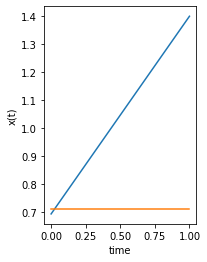

In [0]:
# General Class

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



n = 2  # order of the DE


class StateSpaceModel:
  def __init__(self, order=None, coefficients=None, u=None, A=None, B=None, C=None, D=None):
    self.n = order if coefficients is None else len(coefficients[0])-1
    self.A = np.zeros((self.n,self.n))
    self.A[:(self.n-1), 1:] = np.identity(self.n-1)
    self.B = np.zeros(self.n)
    self.C = np.zeros(self.n)
    self.D = np.zeros(self.n)
    
    
    if(A is not None):
      self.setA(A)
    if(B is not None):
      self.setB(B)
    if(C is not None):
      self.setC(C)
    if(D is not None):
      self.setD(D)
    # Cofficients: [coefficients of the polynomial, cofficients of the polynomial of the output, coefficient of t-term]
    if(coefficients is not None):
      c = np.flip(-np.array(coefficients[0][1:])/coefficients[0][0])
      self.setA(c)
      # print(self.A)
      self.setB(1/coefficients[0][0])
      # print(self.B)
      self.setC(np.array(coefficients[1]))
      self.setD(coefficients[2])

    self.u = u if u is not None else None

    # print(self.A, self.B, self.C, self.u)
    
  def getOrder(self):
    return self.n

  def setA(self, last_row_A):
    self.A[n-1,:] = last_row_A
  
  def setB(self, c):
    self.B[n-1] = c

  def setC(self, C):
    self.C = C

  def setD(self, D):
    self.D = D

  def setU(self, f_t):
    self.u = f_t

  def getStateSpace(self, x, t):
    ret = self.A.dot(x) + self.B.dot(self.u(t))
    return ret

  def getTransferFunction(self, p):
    aux = (np.identity(self.n)*p-self.A)
    ret = self.C.dot(np.linalg.inv(aux)).dot(self.B) + self.D
    return ret


# u is function of t
def functionU(t):
  return t+8

def solve(ssm, x0=None, t=None):
  order = ssm.getOrder()
  initial_conditions = x0 if x0 is not None else np.random.rand(order) 
  time = t if t is not None else np.linspace(0, 1, 1000)
  solution = odeint(ssm.getStateSpace, initial_conditions, time)
  if(t is None):
      return solution, time
  return solution 
  

def plot(solution, time):
  plt.subplot(121)
  plt.plot(time, solution)
  plt.xlabel('time')
  plt.ylabel('x(t)')
  plt.show()  

# ssm = StateSpaceModel(n, functionU)
ssm = StateSpaceModel(order=n, u=lambda t: np.sin(t))
solution, time = solve(ssm)
plot(solution, time)



# Solutions:




Example of the code on question (a)

The solution is $W(p) = \frac{3}{p(3p+2)}$



[[ 0.          1.        ]
 [ 0.         -0.66666667]] [0.         0.33333333] [3 0] <function <lambda> at 0x7f976d814950>


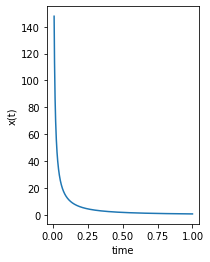

[[ 0.          1.        ]
 [ 0.         -0.66666667]] [0.         0.33333333] [3 0] <function <lambda> at 0x7f976cf561e0>


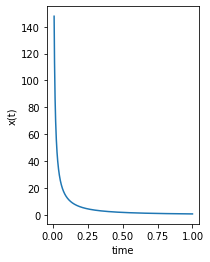

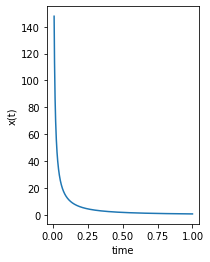

In [0]:
SSM = {}
TF = {}
SSM['a'] = StateSpaceModel(order=2, u=lambda t: 2*t+1, A=[0, -2/3], B=1/3, C=np.array([3,0]))
TF['a'] = SSM['a'].getTransferFunction

tf_plot = []
time = np.linspace(0.01, 1, 1000)
for i in time:
  tf_plot.append(TF['a'](i))

plot(tf_plot, time)

SSM['a'] = StateSpaceModel(coefficients=np.array([[3,2,0],[3,0]]), u=lambda t: 2*t+1)
TF['a'] = SSM['a'].getTransferFunction

tf_plot = []
time = np.linspace(0.01, 1, 1000)
for i in time:
  tf_plot.append(TF['a'](i))

plot(tf_plot, time)

# test for q.a with the answer that I got
test = []
for i in time:
  test.append(3/(i*(3*i+2)))
plot(test,time)

a 	-->	Success
b 	-->	Success
c 	-->	Success
d 	-->	Success
e 	-->	Success
f 	-->	Success
g 	-->	Success
h 	-->	Success
n 	-->	Success
q 	-->	Success
Plot of  a


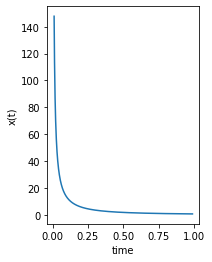

----------------------------------
Plot of  b


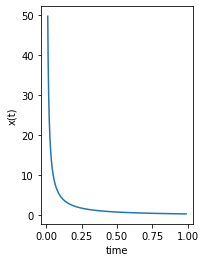

----------------------------------
Plot of  c


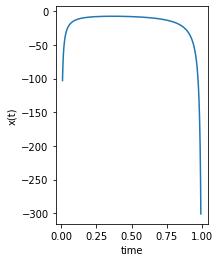

----------------------------------
Plot of  d


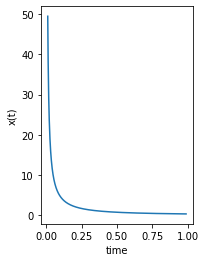

----------------------------------
Plot of  e


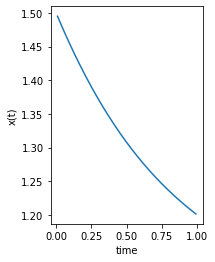

----------------------------------
Plot of  f


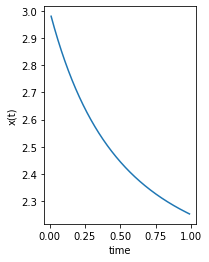

----------------------------------
Plot of  g


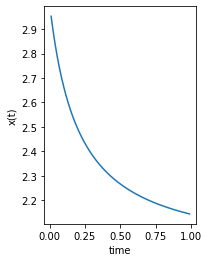

----------------------------------
Plot of  h


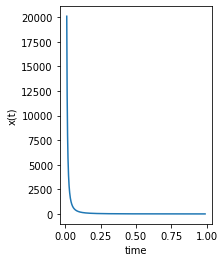

----------------------------------
Plot of  n


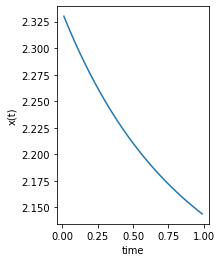

----------------------------------
Plot of  q


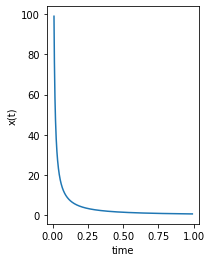

----------------------------------


In [0]:
# [Coefficients of the polynomial], function(t) == u, polynomial of the output, coefficient of t-term]
equations = [[[3,2,0],lambda t: 2*t+1,[3,0], 0], #a
             [[1,2,0],lambda t: t+8,[1,0], 0],   #b
             [[1,-1,0],lambda t: t-4,[1,2], 0],  #c
             [[2,2,0],lambda t: 2*t+9,[1,0], 0], #d
             [[1,2,2],lambda t: t+5,[1,0], 1], #e
             [[1,2,1],lambda t: t+5,[1,0], 2], #f
             [[1,5,1],lambda t: t,[1,0], 2], #g
             [[1,0,0],lambda t: t+3,[2,1], 0], #h
             [[1,3,3],lambda t: t,[1,0], 2], #n
             [[3,3,0],lambda t: 2*t+1,[3,0], 0], #q
             ]

questions_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'n', 'q']
coefficients = {}
transfer_functions = {}
state_space_models = {}
tf_plot = {}

# from 0.01 as some TF has p in the denomenator and it will 1/0 is undefined
# To 0.99 as for question c, TF is not defined on this point as Ip-A is singular has no inverse on that point

x_axis = np.linspace(0.01, 0.99, 1000)


for i,q in enumerate(questions_list):
  print(q, "\t-->\t", end="")
  # if(q == 'c'):
  #   print("Failed")
    # continue
  coefficients[q] = [np.array(equations[i][0]), np.array(equations[i][2]), equations[i][3]]
  state_space_models[q] = StateSpaceModel(coefficients=coefficients[q], u=equations[i][1])
  transfer_functions[q] = state_space_models[q].getTransferFunction
  tf_plot[q] = []
  for i in x_axis:
    tf_plot[q].append(transfer_functions[q](i))
  print("Success")

for q in questions_list:
  # if(q == 'c'):
  #   continue
  print("Plot of ", q)
  plot(tf_plot[q], x_axis)
  print("----------------------------------")
